In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23',)

The most recent data point is: ('2017-08-23',)
One year prior to the last data point is: 2016-08-23


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

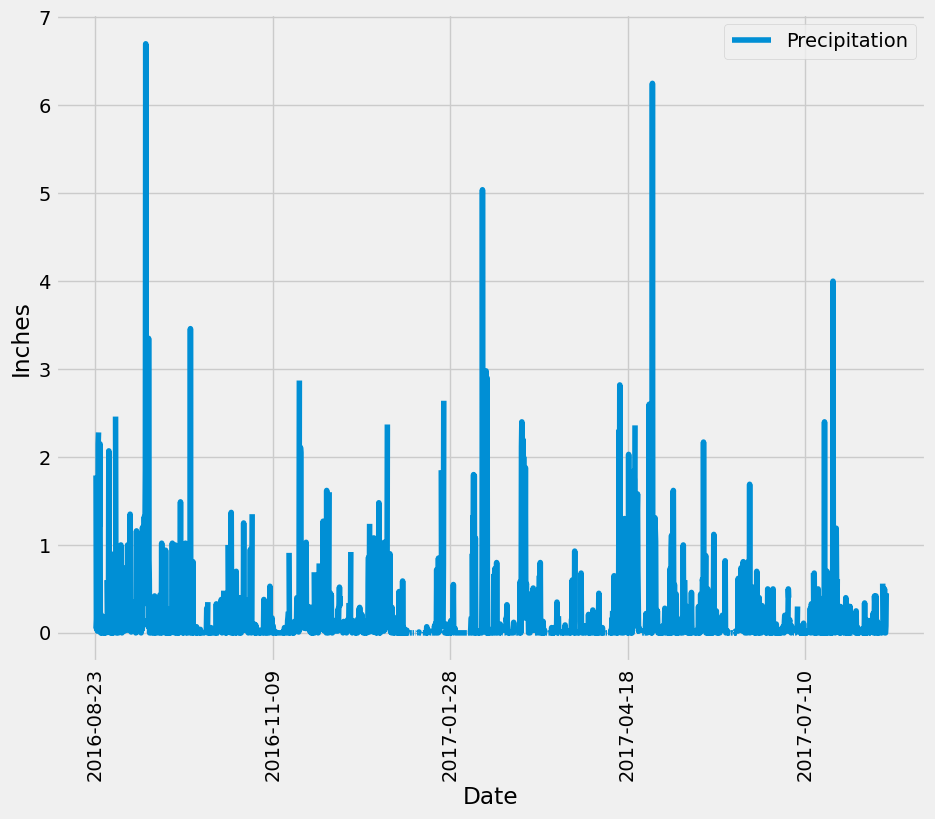

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print("The most recent data point is:", last_date)

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One year prior to the last data point is:", year_ago)

# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_data_df = pd.DataFrame(last_year_data).set_index('date')

# Sort the dataframe by date
sorted_df = last_year_data_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data

sorted_df.plot(ylabel='Inches', xlabel='Date', grid=True, figsize=(10,8))
plt.legend(loc='upper right', labels=['Precipitation'])
plt.locator_params(axis='x', nbins=10)
plt.xticks(rotation='vertical')

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(Station.station)
number_stations.count()

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station,func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()
station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mas_low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
mas_high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
mas_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print("For Station USC00519281:\nLowest Temp:", mas_low, "\nHighest Temp:", mas_high, "\nAverage Temp:", mas_avg)

For Station USC00519281:
Lowest Temp: [(54.0,)] 
Highest Temp: [(85.0,)] 
Average Temp: [(71.66378066378067,)]


Text(0.5, 0, 'Temperature')

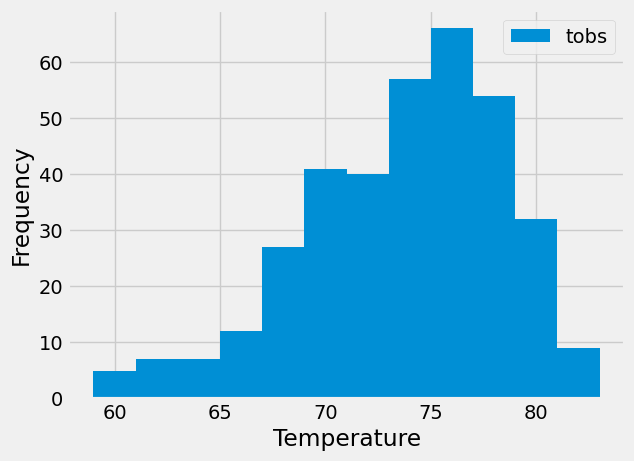

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#find last date entry for station USC00519281
mas_lastdate = session.query(Measurement.date)\
    .filter(Measurement.station == 'USC00519281')\
    .order_by(Measurement.date.desc()).first()

#calculate date one year prior to last date of 8/18/2017
mas_yearago = dt.date(2017, 8, 18) - dt.timedelta(days=365)

#filter for dates between 8/18/2016 and 8/18/2017 for station USC00519281
mas_yeardata = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.date >= mas_yearago)\
    .filter(Measurement.station == 'USC00519281').all()

#Turn into df
mas_yeardata_df = pd.DataFrame(mas_yeardata).set_index('date')

#plot histogram
mas_yeardata_df.plot(kind='hist', bins=12)
plt.xlabel('Temperature')

# Close session

In [16]:
# Close Session
session.close()